In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
import sys
sys.setrecursionlimit(100000)

ModuleNotFoundError: ignored

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/6206/raw_data/FormData-2022-09-15.csv')
df

,user_id,id,answers,form_type,created
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17
2,108353,21933,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:01
3,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07
4,108240,21931,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:39:52
...,...,...,...,...,...
21929,1,5,{'question_1': 'I am cutting down on my caffei...,cancellation,2019-03-28 12:50:16
21930,1,4,"{'question_1': 'It is too expensive for me', '...",cancellation,2019-03-28 12:48:42
21931,1,3,"{'question_1': 'It is too expensive for me', '...",cancellation,2019-03-28 12:47:02
21932,1,2,"{'question_1': ""The coffee wasn't right for me...",cancellation,2019-03-28 12:36:27


In [ ]:
# excluded the users (user_id==1)
rows_removed = []
for i in range(len(df)):
  if df['user_id'][i] == 1:
    rows_removed.append(i)
df.drop(index=rows_removed, inplace=True)

In [ ]:
df

,user_id,id,answers,form_type,created
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17
2,108353,21933,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:01
3,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07
4,108240,21931,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:39:52
...,...,...,...,...,...
21912,103455,23,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 08:40:17
21913,99506,22,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2019-05-17 08:34:47
21914,94989,21,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:29:00
21915,94989,20,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:28:44


In [ ]:
df['question_1'] = df['answers'].str.split(',', expand=True,n=3)[1]

In [ ]:
df

,user_id,id,answers,form_type,created,question_1
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14,'question_1': 'Other'
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17,"'question_1': ""I don't drink enough for a cof..."
2,108353,21933,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:01,"'question_1': ""I don't drink enough for a cof..."
3,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07,'question_1': 'Other'
4,108240,21931,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:39:52,'question_1': 'Other'
...,...,...,...,...,...,...
21912,103455,23,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 08:40:17,"'question_1': ""I don't drink enough for a cof..."
21913,99506,22,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2019-05-17 08:34:47,'question_1': 'I am cutting down on my caffei...
21914,94989,21,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:29:00,"'question_1': ""The coffee wasn't right for me"""
21915,94989,20,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:28:44,"'question_1': ""The coffee wasn't right for me"""


In [ ]:
df['question_1'] = df['question_1'].str.split(':', expand=True)[1]

In [ ]:
df['question_2'] = df['answers'].str.split(',', expand=True,n=3)[2]

In [ ]:
df['question_2'] = df['question_2'].str.split(':', expand=True)[1]

In [ ]:
df['question_3'] = df['answers'].str.split(',', expand=True,n=3)[3]

In [ ]:
df['question_3'] = df['question_3'].str.split(':', expand=True)[1]

In [ ]:
df

,user_id,id,answers,form_type,created,question_1,question_2,question_3
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14,'Other','',''}
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17,"""I don't drink enough for a coffee subscripti...",'',''}
2,108353,21933,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:01,"""I don't drink enough for a coffee subscripti...",'',''}
3,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07,'Other','',''}
4,108240,21931,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:39:52,'Other','',''}
...,...,...,...,...,...,...,...,...
21912,103455,23,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 08:40:17,"""I don't drink enough for a coffee subscripti...",'',''}
21913,99506,22,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2019-05-17 08:34:47,'I am cutting down on my caffeine intake','',''}
21914,94989,21,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:29:00,"""The coffee wasn't right for me""",'The coffee was sour',''}
21915,94989,20,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:28:44,"""The coffee wasn't right for me""",'The coffee was sour',''}


In [ ]:
num_question_2_null = 0
for i in range(len(df)):
  if df['question_2'][i] != " ''":
    num_question_2_null += 1

num_question_2_null

2163

Can't remove the question_2 column

In [ ]:
num_question_3_null = 0
for i in range(len(df)):
  if df['question_3'][i] != " ''}":
    num_question_3_null += 1

num_question_3_null

677

Because 677/21917 == 0.031, So remove this question_3

In [ ]:
df.drop(columns = 'question_3', inplace=True)


In [ ]:
df.head()

,user_id,id,answers,form_type,created,question_1,question_2
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14,'Other',''
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17,"""I don't drink enough for a coffee subscripti...",''
2,108353,21933,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:01,"""I don't drink enough for a coffee subscripti...",''
3,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07,'Other',''
4,108240,21931,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:39:52,'Other',''


In [ ]:
# excluded the users whose quetion_1 is None
num_none_q1 = []
for i in range(len(df)):
  if df['question_1'][i] == None:
    num_none_q1.append(i)
len(num_none_q1)

344

In [ ]:
df.drop(index = num_none_q1, inplace = True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,user_id,id,answers,form_type,created,question_1,question_2
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14,'Other',''
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17,"""I don't drink enough for a coffee subscripti...",''
2,108353,21933,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:01,"""I don't drink enough for a coffee subscripti...",''
3,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07,'Other',''
4,108240,21931,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:39:52,'Other',''
...,...,...,...,...,...,...,...
21568,103455,23,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 08:40:17,"""I don't drink enough for a coffee subscripti...",''
21569,99506,22,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2019-05-17 08:34:47,'I am cutting down on my caffeine intake',''
21570,94989,21,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:29:00,"""The coffee wasn't right for me""",'The coffee was sour'
21571,94989,20,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:28:44,"""The coffee wasn't right for me""",'The coffee was sour'


In [ ]:
# excluded the users whose quetion_2 is None
num_none_q2 = []
for i in range(len(df)):
  if df['question_2'][i] == None:
    num_none_q2.append(i)
num_none_q2

[9191]

In [ ]:
df.drop(index = num_none_q2, inplace = True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,user_id,id,answers,form_type,created,question_1,question_2
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14,'Other',''
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17,"""I don't drink enough for a coffee subscripti...",''
2,108353,21933,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:01,"""I don't drink enough for a coffee subscripti...",''
3,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07,'Other',''
4,108240,21931,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:39:52,'Other',''
...,...,...,...,...,...,...,...
21567,103455,23,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 08:40:17,"""I don't drink enough for a coffee subscripti...",''
21568,99506,22,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2019-05-17 08:34:47,'I am cutting down on my caffeine intake',''
21569,94989,21,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:29:00,"""The coffee wasn't right for me""",'The coffee was sour'
21570,94989,20,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:28:44,"""The coffee wasn't right for me""",'The coffee was sour'


In [ ]:
for i in range(len(df)):
  df['question_2'][i] = df['question_2'][i][2:-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in range(len(df)):
  df['question_1'][i] = df['question_1'][i][2:-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,user_id,id,answers,form_type,created,question_1,question_2
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14,Other,
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17,I don't drink enough for a coffee subscription...,
2,108353,21933,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:01,I don't drink enough for a coffee subscription...,
3,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07,Other,
4,108240,21931,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:39:52,Other,
...,...,...,...,...,...,...,...
21567,103455,23,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 08:40:17,I don't drink enough for a coffee subscription...,
21568,99506,22,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2019-05-17 08:34:47,I am cutting down on my caffeine intake,
21569,94989,21,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:29:00,The coffee wasn't right for me,The coffee was sour
21570,94989,20,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:28:44,The coffee wasn't right for me,The coffee was sour


In [ ]:
df['question_1'].unique()

array(['Other', "I don't drink enough for a coffee subscription service",
       'I am cutting down on my caffeine intake',
       'It is too expensive for me', "The coffee wasn't right for me", '',
       "I didn't quite enjoy the whole experience",
       "love you guys! But other coffee beans just aren't cutting it for me.",
       'I would definitely buy your coffee beans when I am back in Singapore for a visit!',
       'Im have to open the pod and do it drip filter style'],
      dtype=object)

In [ ]:
df['question_2'].unique()

array(['', 'The coffee was sour', 'The coffee was too dark', 'Other',
       'The coffee was too light',
       "I didn't quite enjoy the whole experience"], dtype=object)

In [ ]:
# remove the "answers" column
df.drop(columns = 'answers', inplace=True)

In [ ]:
df = pd.get_dummies(df,columns=["question_1","question_2"])

In [ ]:
df.head()

,user_id,id,form_type,created,question_1_,question_1_I am cutting down on my caffeine intake,question_1_I didn't quite enjoy the whole experience,question_1_I don't drink enough for a coffee subscription service,question_1_I would definitely buy your coffee beans when I am back in Singapore for a visit!,question_1_Im have to open the pod and do it drip filter style,question_1_It is too expensive for me,question_1_Other,question_1_The coffee wasn't right for me,question_1_love you guys! But other coffee beans just aren't cutting it for me.,question_2_,question_2_I didn't quite enjoy the whole experience,question_2_Other,question_2_The coffee was sour,question_2_The coffee was too dark,question_2_The coffee was too light
0,89534,21935,cancellation,2022-09-15 11:24:14,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,108353,21934,cancellation,2022-09-15 08:19:17,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,108353,21933,cancellation,2022-09-15 08:19:01,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,108240,21932,cancellation,2022-09-14 22:40:07,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,108240,21931,cancellation,2022-09-14 22:39:52,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
df.columns

Index(['user_id', 'id', 'form_type', 'created', 'question_1_',
       'question_1_I am cutting down on my caffeine intake',
       'question_1_I didn't quite enjoy the whole experience',
       'question_1_I don't drink enough for a coffee subscription service',
       'question_1_I would definitely buy your coffee beans when I am back in Singapore for a visit!',
       'question_1_Im have to open the pod and do it drip filter style',
       'question_1_It is too expensive for me', 'question_1_Other',
       'question_1_The coffee wasn't right for me',
       'question_1_love you guys! But other coffee beans just aren't cutting it for me.',
       'question_2_', 'question_2_I didn't quite enjoy the whole experience',
       'question_2_Other', 'question_2_The coffee was sour',
       'question_2_The coffee was too dark',
       'question_2_The coffee was too light'],
      dtype='object')

对one hot进行重命名（因为怕出错，所以分步做）

In [ ]:
df.rename(columns = {'question_1_':'question_1_0','question_1_I am cutting down on my caffeine intake':'question_1_1',"question_1_I didn't quite enjoy the whole experience":"question_1_2"}, inplace=True)

In [ ]:
df.columns

Index(['user_id', 'id', 'form_type', 'created', 'question_1_0', 'question_1_1',
       'question_1_2',
       'question_1_I don't drink enough for a coffee subscription service',
       'question_1_I would definitely buy your coffee beans when I am back in Singapore for a visit!',
       'question_1_Im have to open the pod and do it drip filter style',
       'question_1_It is too expensive for me', 'question_1_Other',
       'question_1_The coffee wasn't right for me',
       'question_1_love you guys! But other coffee beans just aren't cutting it for me.',
       'question_2_', 'question_2_I didn't quite enjoy the whole experience',
       'question_2_Other', 'question_2_The coffee was sour',
       'question_2_The coffee was too dark',
       'question_2_The coffee was too light'],
      dtype='object')

In [ ]:
df.rename(columns = {"question_1_I don't drink enough for a coffee subscription service":'question_1_3','question_1_I would definitely buy your coffee beans when I am back in Singapore for a visit!':'question_1_4',"question_1_Im have to open the pod and do it drip filter style":"question_1_5"}, inplace=True)

In [ ]:
df.columns

Index(['user_id', 'id', 'form_type', 'created', 'question_1_0', 'question_1_1',
       'question_1_2', 'question_1_3', 'question_1_4', 'question_1_5',
       'question_1_It is too expensive for me', 'question_1_Other',
       'question_1_The coffee wasn't right for me',
       'question_1_love you guys! But other coffee beans just aren't cutting it for me.',
       'question_2_', 'question_2_I didn't quite enjoy the whole experience',
       'question_2_Other', 'question_2_The coffee was sour',
       'question_2_The coffee was too dark',
       'question_2_The coffee was too light'],
      dtype='object')

In [ ]:
df.rename(columns = {"question_1_It is too expensive for me":'question_1_6','question_1_Other':'question_1_7',"question_1_The coffee wasn't right for me":"question_1_8","question_1_love you guys! But other coffee beans just aren't cutting it for me.":"question_1_9"}, inplace=True)

In [ ]:
df.columns

Index(['user_id', 'id', 'form_type', 'created', 'question_1_0', 'question_1_1',
       'question_1_2', 'question_1_3', 'question_1_4', 'question_1_5',
       'question_1_6', 'question_1_7', 'question_1_8', 'question_1_9',
       'question_2_', 'question_2_I didn't quite enjoy the whole experience',
       'question_2_Other', 'question_2_The coffee was sour',
       'question_2_The coffee was too dark',
       'question_2_The coffee was too light'],
      dtype='object')

In [ ]:
df.rename(columns = {"question_2_":'question_2_0',"question_2_I didn't quite enjoy the whole experience":"question_2_1","question_2_Other":"question_2_2","question_2_The coffee was sour":"question_2_3",'question_2_The coffee was too dark':'question_2_4','question_2_The coffee was too light':'question_2_5'}, inplace=True)

In [ ]:
df.columns

Index(['user_id', 'id', 'form_type', 'created', 'question_1_0', 'question_1_1',
       'question_1_2', 'question_1_3', 'question_1_4', 'question_1_5',
       'question_1_6', 'question_1_7', 'question_1_8', 'question_1_9',
       'question_2_0', 'question_2_1', 'question_2_2', 'question_2_3',
       'question_2_4', 'question_2_5'],
      dtype='object')

In [ ]:
df.head()

,user_id,id,form_type,created,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5
0,89534,21935,cancellation,2022-09-15 11:24:14,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,108353,21934,cancellation,2022-09-15 08:19:17,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,108353,21933,cancellation,2022-09-15 08:19:01,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,108240,21932,cancellation,2022-09-14 22:40:07,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,108240,21931,cancellation,2022-09-14 22:39:52,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Only one type: cancellation, so drop this column
df['form_type'].unique()

array(['cancellation'], dtype=object)

In [ ]:
df.drop(columns = ['form_type','id'], inplace=True)

In [ ]:
df.rename(columns = {"created":"cancellation_created_time"}, inplace=True)

In [ ]:
df

,user_id,cancellation_created_time,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5
0,89534,2022-09-15 11:24:14,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,108353,2022-09-15 08:19:17,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,108353,2022-09-15 08:19:01,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,108240,2022-09-14 22:40:07,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,108240,2022-09-14 22:39:52,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21567,103455,2019-05-17 08:40:17,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
21568,99506,2019-05-17 08:34:47,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
21569,94989,2019-05-17 08:29:00,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
21570,94989,2019-05-17 08:28:44,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
# expand=True, 这个参数直接将分列后的结果转换成DataFrame
df['cancellation_date'] = df['cancellation_created_time'].str.split(' ', expand=True,)[0]

In [ ]:
df['cancellation_time'] = df['cancellation_created_time'].str.split(' ', expand=True,)[1]

In [ ]:
df.drop(columns=['cancellation_created_time'],inplace=True)

In [ ]:
df.head()

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time
0,89534,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-15,11:24:14
1,108353,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-15,08:19:17
2,108353,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-15,08:19:01
3,108240,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:40:07
4,108240,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:39:52


In [ ]:
df_features = df.iloc[:,1:-2]
df_features_arr = np.array(df_features)

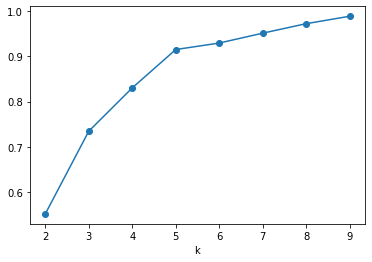

In [ ]:
sil_score = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(df_features_arr)
  sil_score.append(silhouette_score(df_features_arr,kmeans.labels_))
plt.plot(range(2,10), sil_score, 'o-')
plt.xlabel('k')
plt.show()

In [ ]:
k_means = KMeans(n_clusters=5, random_state=0)

k_means.fit(df_features_arr)

K = k_means.predict(df_features_arr)

In [ ]:
df_cluster = df.copy()
df_cluster['cluster_group'] = K

In [ ]:
df_cluster

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time,cluster_group
0,89534,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-15,11:24:14,1
1,108353,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-15,08:19:17,0
2,108353,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-15,08:19:01,0
3,108240,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:40:07,1
4,108240,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:39:52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21567,103455,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-17,08:40:17,0
21568,99506,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-17,08:34:47,2
21569,94989,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2019-05-17,08:29:00,3
21570,94989,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2019-05-17,08:28:44,3


In [ ]:
df_cluster0 = df_cluster[df_cluster['cluster_group'] == 0]
df_cluster1 = df_cluster[df_cluster['cluster_group'] == 1]
df_cluster2 = df_cluster[df_cluster['cluster_group'] == 2]
df_cluster3 = df_cluster[df_cluster['cluster_group'] == 3]
df_cluster4 = df_cluster[df_cluster['cluster_group'] == 4]

In [ ]:
df_cluster0

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time,cluster_group
1,108353,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-15,08:19:17,0
2,108353,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-15,08:19:01,0
9,114739,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-14,18:44:22,0
10,114739,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-14,18:44:09,0
18,107727,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-14,07:17:20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21556,97869,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-17,21:27:21,0
21558,96043,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-17,16:38:39,0
21562,103920,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-17,12:20:55,0
21563,103920,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-17,12:20:41,0


In [ ]:
df_cluster1

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time,cluster_group
0,89534,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-15,11:24:14,1
3,108240,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:40:07,1
4,108240,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:39:52,1
5,108240,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:39:34,1
6,122399,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:13:26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21554,103939,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2019-05-18,02:24:26,1
21557,93762,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2019-05-17,21:05:43,1
21559,102816,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2019-05-17,15:28:21,1
21561,103297,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2019-05-17,13:05:31,1


In [ ]:
df_cluster2

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time,cluster_group
7,109172,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-14,19:34:57,2
8,109172,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-14,19:34:47,2
14,128432,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-14,08:41:29,2
23,116135,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-13,09:07:39,2
33,100184,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-12,22:13:12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21551,89979,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-18,09:25:03,2
21552,99622,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-18,08:06:04,2
21555,103829,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-18,00:53:21,2
21566,103848,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-17,08:46:43,2


In [ ]:
df_cluster3

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time,cluster_group
25,133515,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2022-09-13,08:29:59,3
39,132331,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2022-09-11,20:39:13,3
40,132331,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2022-09-11,20:39:00,3
65,132887,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2022-09-07,11:20:35,3
81,89617,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2022-09-06,08:56:06,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21545,103330,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019-05-18,13:35:54,3
21560,102983,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2019-05-17,14:28:24,3
21564,101826,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2019-05-17,11:36:21,3
21569,94989,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2019-05-17,08:29:00,3


In [ ]:
df_cluster4

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time,cluster_group
11,121880,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2022-09-14,17:56:37,4
27,133664,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2022-09-12,23:51:20,4
31,132330,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2022-09-12,23:29:35,4
32,132330,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2022-09-12,23:29:18,4
82,86972,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2022-09-06,08:33:46,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21529,94204,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2019-05-19,10:11:46,4
21542,103936,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2019-05-18,14:45:36,4
21543,103789,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2019-05-18,14:16:30,4
21544,103717,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2019-05-18,13:48:51,4


## Review.csv

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/6206/raw_data/Review-2022-09-15.csv')
df1

,status,score,title,brewing_method,body,product_id,user_id,created
0,Requires Moderation,5,Fragrant,Drip,Its fragrant and easy to drink.,3757,133241,12-09-2022
1,Requires Moderation,5,Sweet,Drip,"Its light and sweet. When brewed properly, the...",5638,133241,12-09-2022
2,Requires Moderation,2,Never received it,Espresso,Not the hook fault if lost in mailing. But mor...,4043,133348,28-08-2022
3,Requires Moderation,5,1001251680072837,Espresso,Had it taken a lengthy waiting time for a loca...,5184,125168,25-08-2022
4,Requires Moderation,1,Coffee didn't make its way to us!,NaN,Hook Coffee is disappointing. This purchase ha...,4895,107372,23-08-2022
...,...,...,...,...,...,...,...,...
1280,Approved,3,NaN,NaN,NaN,3768,101586,16-05-2019
1281,Approved,5,NaN,NaN,NaN,3845,91259,16-05-2019
1282,Approved,5,NaN,NaN,NaN,3607,91180,16-05-2019
1283,Approved,5,NaN,NaN,NaN,3768,92428,16-05-2019


In [ ]:
df1.drop(columns = ['title','body'], inplace=True)

In [ ]:
df1.head()

,status,score,brewing_method,product_id,user_id,created
0,Requires Moderation,5,Drip,3757,133241,12-09-2022
1,Requires Moderation,5,Drip,5638,133241,12-09-2022
2,Requires Moderation,2,Espresso,4043,133348,28-08-2022
3,Requires Moderation,5,Espresso,5184,125168,25-08-2022
4,Requires Moderation,1,NaN,4895,107372,23-08-2022


In [ ]:
df1.isnull().sum()

status               0
score                0
brewing_method    1051
product_id           0
user_id              0
created              0
dtype: int64

In [ ]:
# 空值用什么来代替？

### 'status' means if you want to buy it once again(do you like it).
### 'score' indicates the score you rating for this purchase order. Take 'Requires Moderation' as 0, 'Approved' as 1, 'Rejected' as -1


In [ ]:
df1['status'].unique()

NameError: ignored

In [ ]:
for i in range(len(df1)):
  if df1['status'][i] == 'Approved':
    df1['status'][i] = 1
  elif df1['status'][i] == 'Requires Moderation':
    df1['status'][i] = 0
  else:
    df1['status'][i] = -1

NameError: ignored

In [ ]:
df1

In [ ]:
created_month = []
for i in range(len(df1)):
  created_month.append(df1['created'][i][3:])
created_month

In [ ]:
df1.insert(loc=6, column='created_month', value=created_month)
df1

In [ ]:
df_agg = df1.groupby('created_month').agg({'status':'mean','score':'mean'})
df_agg

In [ ]:
df_agg = pd.DataFrame(df_agg)

In [ ]:
df_agg = df_agg.reset_index()
df_agg

In [ ]:
df_agg['created_month'] = pd.to_datetime(df_agg['created_month'],format='%m-%Y')
df_agg

In [ ]:
df_agg.sort_values(by='created_month',ascending=False, inplace=True)

In [ ]:
df_agg

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(df_agg['created_month'], df_agg['score'], label='score')
plt.plot(df_agg['created_month'], df_agg['status'], label='status')
plt.legend()
plt.title("Customer's satisfaction with the order and willingness to buy next time", fontsize=15)
plt.show()
# plt.figure(figsize=(12,9))
# plt.xticks(rotation=45)
# plt.xlabel('Date', fontsize=15)
# plt.ylabel('Cases', fontsize=15)
# plt.title("the number of COVID-19 cases in Singapore from Dec. 27, 2021 to Mar. 20, 2022", fontsize=15)
# sns.lineplot(x='created',y='status',data=df_agg,legend='full')
# sns.lineplot(x='created',y='score',data=df_agg,legend='full')
# plt.legend()
# plt.grid()
# plt.show()